In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape

(7043, 21)

In [6]:
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [11]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

# Univariate Analysis

In [10]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')
from sklearn.impute import SimpleImputer
simple_mean=SimpleImputer(strategy='mean')
df['TotalCharges']=simple_mean.fit_transform(df[['TotalCharges']])


In [16]:
!pip install chart_studio
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot


Text(0, 0.5, 'Count of customers')

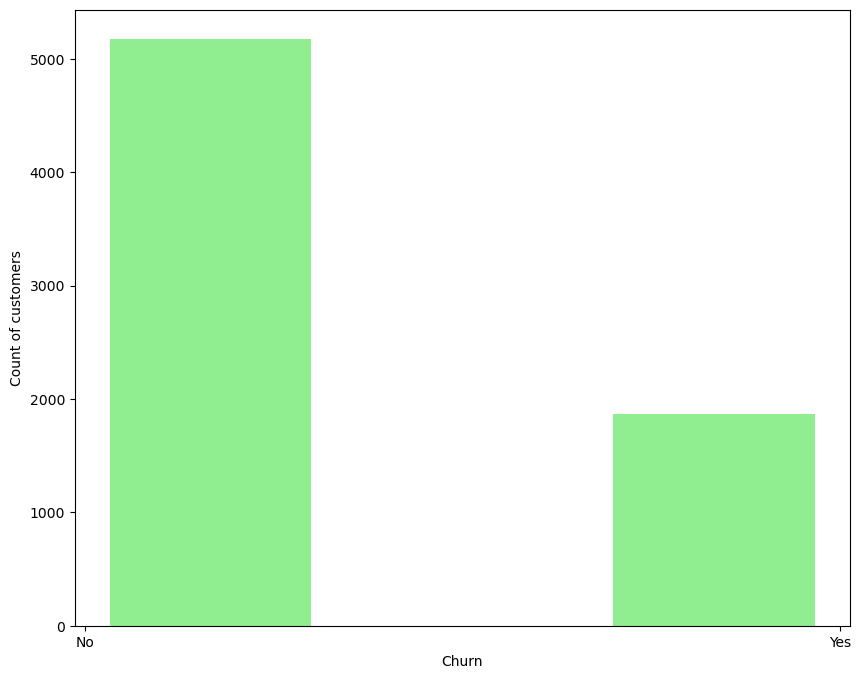

In [46]:
plt.figure(figsize=(10,8))
plt.hist(df['Churn'],bins=3,color='lightgreen',rwidth=0.8)
plt.xlabel('Churn')
plt.ylabel('Count of customers')


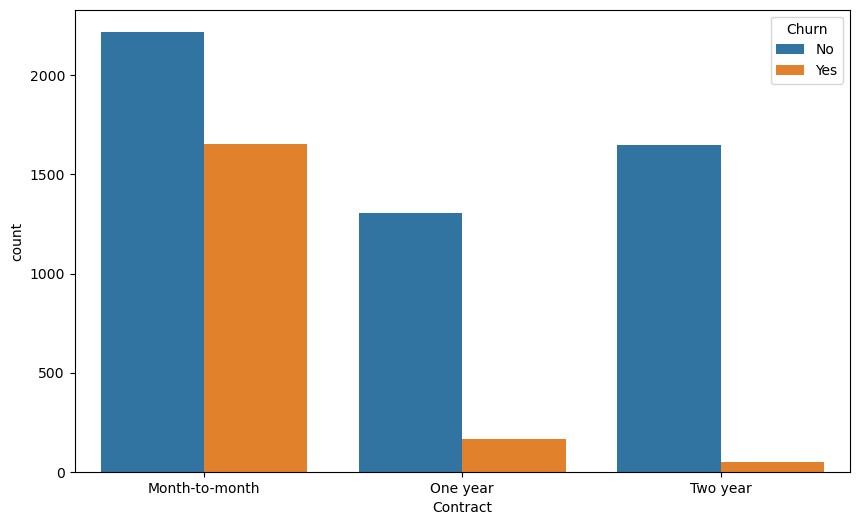

In [67]:
plt.figure(figsize=(10,6))
sns.countplot(x='Contract',hue='Churn',data=df)
plt.show()

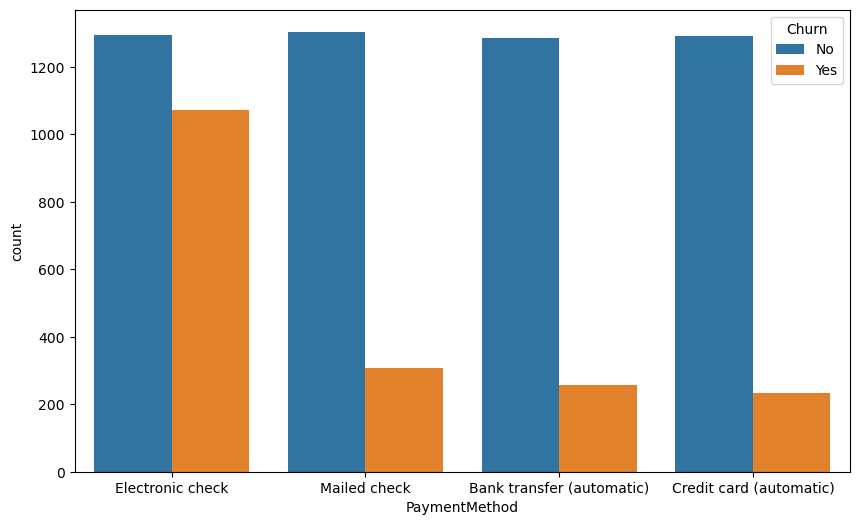

In [68]:
plt.figure(figsize=(10,6))
sns.countplot(x='PaymentMethod',hue='Churn',data=df)
plt.show()

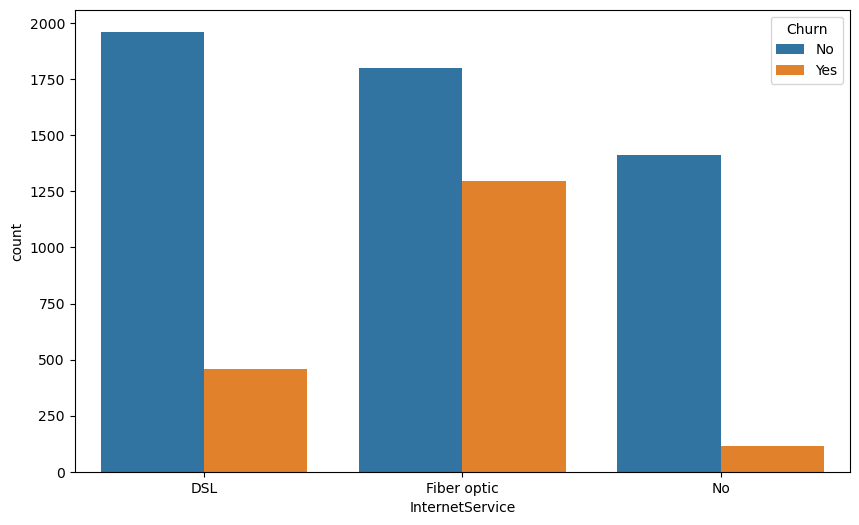

In [69]:
plt.figure(figsize=(10,6))
sns.countplot(x='InternetService',hue='Churn',data=df)
plt.show()

<Axes: xlabel='MonthlyCharges', ylabel='Count'>

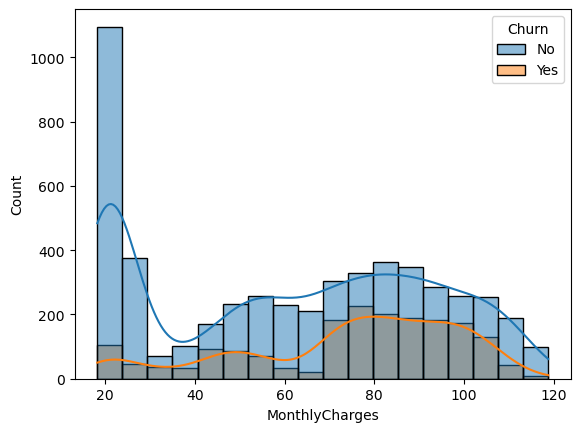

In [73]:
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', kde=True)


<Axes: xlabel='tenure', ylabel='Count'>

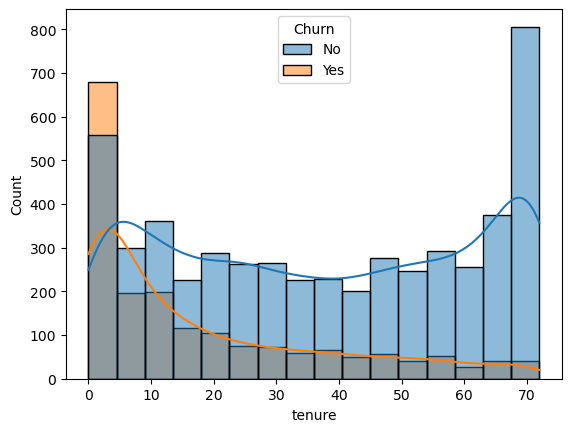

In [74]:
sns.histplot(data=df, x='tenure', hue='Churn', kde=True)


In [75]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

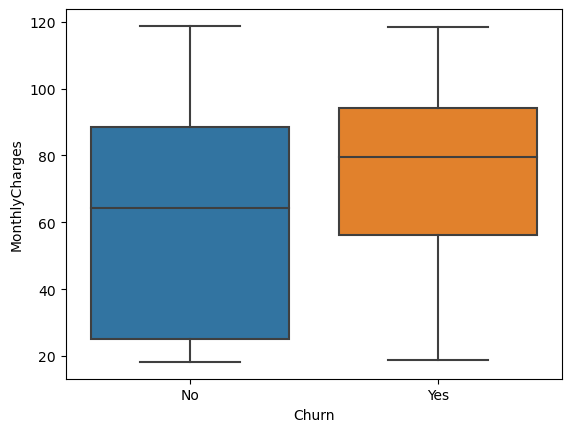

In [72]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)


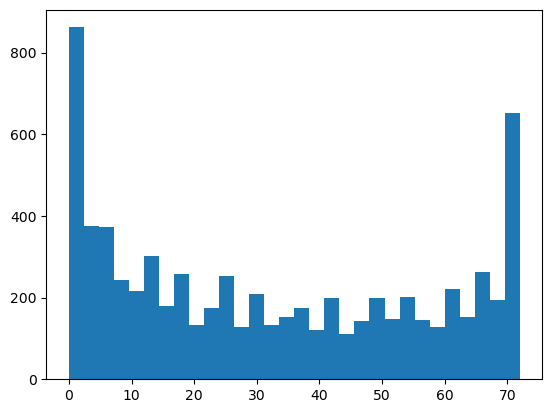

In [76]:
plt.hist(df['tenure'], bins=30)
plt.show()


C:\Users\sapta\AppData\Local\Temp\ipykernel_23868\4183074889.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

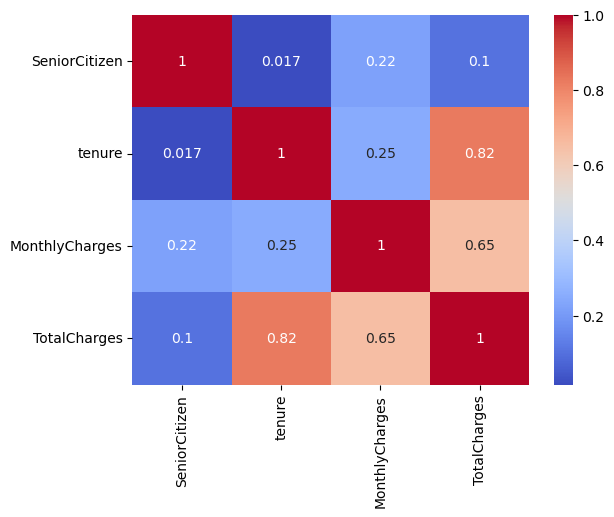

In [70]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


In [191]:
column_to_keep=['gender','SeniorCitizen','Partner','Dependents','tenure','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges','Churn']
df=df[column_to_keep]
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [192]:
df['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [193]:
from sklearn.preprocessing import LabelEncoder
Label_encoder=LabelEncoder()
categorical_columns=['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']
for col in categorical_columns:
    df[col]=Label_encoder.fit_transform(df[col])

In [194]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.5,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.5,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.9,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.6,1


# Training and testing sets

In [195]:
X=df.drop('Churn',axis=1)
y=df['Churn']

In [196]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [197]:
X_train['TotalCharges']=pd.to_numeric(X_train['TotalCharges'],errors='coerce')
X_test['TotalCharges']=pd.to_numeric(X_test['TotalCharges'],errors='coerce')

In [198]:
X_train.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
dtype: object

In [199]:
print(y_train.value_counts(normalize=True))


0    0.734469
1    0.265531
Name: Churn, dtype: float64


# SimpleImputer

In [200]:
from sklearn.impute import SimpleImputer

In [201]:
simple_mean=SimpleImputer(strategy='mean')
X_train['TotalCharges']=simple_mean.fit_transform(X_train[['TotalCharges']])
X_test['TotalCharges']=simple_mean.fit_transform(X_test[['TotalCharges']])

In [202]:
X_train.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

# Standardize Features

In [203]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [204]:
X_train

array([[-1.02516569e+00, -4.37749204e-01, -9.69578591e-01, ...,
         1.33926673e+00, -4.73723375e-04, -4.22105022e-01],
       [-1.02516569e+00, -4.37749204e-01, -9.69578591e-01, ...,
        -1.47094882e+00,  1.07475386e+00,  1.25536015e+00],
       [ 9.75452077e-01, -4.37749204e-01,  1.03137591e+00, ...,
         4.02528212e-01, -1.37649913e+00, -1.00299144e+00],
       ...,
       [ 9.75452077e-01, -4.37749204e-01,  1.03137591e+00, ...,
         4.02528212e-01, -1.45294499e+00, -8.77999245e-01],
       [ 9.75452077e-01,  2.28441306e+00, -9.69578591e-01, ...,
         4.02528212e-01,  1.14953785e+00, -4.82544455e-01],
       [ 9.75452077e-01, -4.37749204e-01, -9.69578591e-01, ...,
        -5.34210304e-01, -1.49781538e+00, -8.11102324e-01]])

# LogisticRegression

In [232]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(X_train,y_train)
y_pred=lg.predict(X_test)

In [233]:
from sklearn.metrics import classification_report

y_pred = lg.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



# AccuracyScore

In [234]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8161816891412349

# Save Model

In [235]:
import pickle
pickle.dump(lg,open('Customer_churn_analysis.pkl','wb'))

# Classification System

In [236]:
data = {
        'gender': [gender],
        'SeniorCitizen': [SeniorCitizen],
        'Partner': [Partner],
        'Dependents': [Dependents],
        'tenure': [tenure],
        'PhoneService': [PhoneService],
        'MultipleLines': [MultipleLines],
        'InternetService': [InternetService],
        'OnlineSecurity': [OnlineSecurity],
        'OnlineBackup': [OnlineBackup],
        'DeviceProtection': [DeviceProtection],
        'TechSupport': [TechSupport],
        'StreamingTV': [StreamingTV],
        'StreamingMovies': [StreamingMovies],
        'Contract': [Contract],
        'PaperlessBilling': [PaperlessBilling],
        'PaymentMethod': [PaymentMethod],
        'MonthlyCharges': [MonthlyCharges],
        'TotalCharges': [TotalCharges]
    }

df1 = pd.DataFrame(data)
df1


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,13454465653565,100000


In [237]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


def predictive(gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines,InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport,StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod,
MonthlyCharges, TotalCharges):

    data = {
        'gender': [gender],
        'SeniorCitizen': [SeniorCitizen],
        'Partner': [Partner],
        'Dependents': [Dependents],
        'tenure': [tenure],
        'PhoneService': [PhoneService],
        'MultipleLines': [MultipleLines],
        'InternetService': [InternetService],
        'OnlineSecurity': [OnlineSecurity],
        'OnlineBackup': [OnlineBackup],
        'DeviceProtection': [DeviceProtection],
        'TechSupport': [TechSupport],
        'StreamingTV': [StreamingTV],
        'StreamingMovies': [StreamingMovies],
        'Contract': [Contract],
        'PaperlessBilling': [PaperlessBilling],
        'PaymentMethod': [PaymentMethod],
        'MonthlyCharges': [MonthlyCharges],
        'TotalCharges': [TotalCharges]
    }

    df1 = pd.DataFrame(data)

    # Encoding categorical data
    categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService','MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup','DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies','Contract', 'PaperlessBilling', 'PaymentMethod']

    for column in categorical_columns:
        df1[column] = Label_encoder.fit_transform(df1[column])

    df1= scaler.fit_transform(df1)
    result = lg.predict(df1).reshape(1,-1)

    return result[0]



In [238]:
df1


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,13454465653565,100000


In [246]:

gender="Male"
SeniorCitizen=0
Partner="No"
Dependents="No"
tenure=2
PhoneService="Yes"
MultipleLines="No"
InternetService="DSL"
OnlineSecurity="Yes"
OnlineBackup="Yes"
DeviceProtection="No"
TechSupport="No"
StreamingTV="No"
StreamingMovies="No"
Contract="Month-to-month"
PaperlessBilling="Yes"
PaymentMethod="Mailed check"
MonthlyCharges=53.85
TotalCharges=108.15
result=predictive(gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines,InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport,StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod,MonthlyCharges, TotalCharges)
if result==0:
    print("Not Churn")
else:
    print("Churn")
  

Not Churn
